# **[DACON] 전복 나이 예측 경진대회**
---
- 대회 URL : https://dacon.io/competitions/official/235877/overview/description

### **1. train.csv : 학습 데이터**
id : 샘플 아이디  
Gender : 전복 성별  
Lenght : 전복 길이  
Diameter : 전복 둘레  
Height : 전복 키   
Whole Weight : 전복 전체 무게  
Shucked Weight : 껍질을 제외한 무게  
Viscra Weight : 내장 무게  
Shell Weight : 껍질 무게  
Target : 전복 나이   


### **2. test.csv : 테스트 데이터**
id : 샘플 아이디  
Gender : 전복 성별  
Lenght : 전복 길이   
Diameter : 전복 둘레  
Height : 전복 키   
Whole Weight : 전복 전체 무게  
Shucked Weight : 껍질을 제외한 무게  
Viscra Weight : 내장 무게  
Shell Weight : 껍질 무게  


### **3. sample_submissoin.csv : 제출 양식**
id : 샘플 아이디  
Target : 전복 나이

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Step 0. 라이브러리 불러오기**
---

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

# **Step 1. 데이터 확인**
---

## **1.1 데이터 불러오기**

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/[DACON] abalone/train.csv')
test = pd.read_csv('/content/drive/MyDrive/[DACON] abalone/test.csv')

In [ ]:
train.head()

,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,1,M,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100,15
1,2,I,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,8
2,3,I,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,18
3,4,M,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370,13
4,5,I,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400,6


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              1253 non-null   int64  
 1   Gender          1253 non-null   object 
 2   Lenght          1253 non-null   float64
 3   Diameter        1253 non-null   float64
 4   Height          1253 non-null   float64
 5   Whole Weight    1253 non-null   float64
 6   Shucked Weight  1253 non-null   float64
 7   Viscra Weight   1253 non-null   float64
 8   Shell Weight    1253 non-null   float64
 9   Target          1253 non-null   int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 98.0+ KB


In [ ]:
train = train.drop('id', axis = 1)

In [ ]:
test.head()

,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight
0,1,F,0.595,0.470,0.155,1.121,0.4515,0.1780,0.1550
1,2,M,0.580,0.450,0.150,0.927,0.2760,0.1815,0.3600
2,3,I,0.260,0.205,0.070,0.097,0.0415,0.0190,0.0305
3,4,M,0.590,0.460,0.130,1.102,0.4550,0.2055,0.3300
4,5,F,0.595,0.465,0.140,1.113,0.5175,0.2440,0.3050


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2924 entries, 0 to 2923
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              2924 non-null   int64  
 1   Gender          2924 non-null   object 
 2   Lenght          2924 non-null   float64
 3   Diameter        2924 non-null   float64
 4   Height          2924 non-null   float64
 5   Whole Weight    2924 non-null   float64
 6   Shucked Weight  2924 non-null   float64
 7   Viscra Weight   2924 non-null   float64
 8   Shell Weight    2924 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 205.7+ KB


In [ ]:
test = test.drop('id', axis = 1)

In [ ]:
print('train 데이터 개수 : ', len(train))
print('test 데이터 개수 : ', len(test))

train 데이터 개수 :  1253
test 데이터 개수 :  2924


- 이번 데이터셋은 독특하게 train 데이터보다 test 데이터의 수가 더 많다.
- 또한 데이터의 양이 많지 않다.

## **1.2 결측치 확인**

In [ ]:
train.isnull().sum()

Gender            0
Lenght            0
Diameter          0
Height            0
Whole Weight      0
Shucked Weight    0
Viscra Weight     0
Shell Weight      0
Target            0
dtype: int64

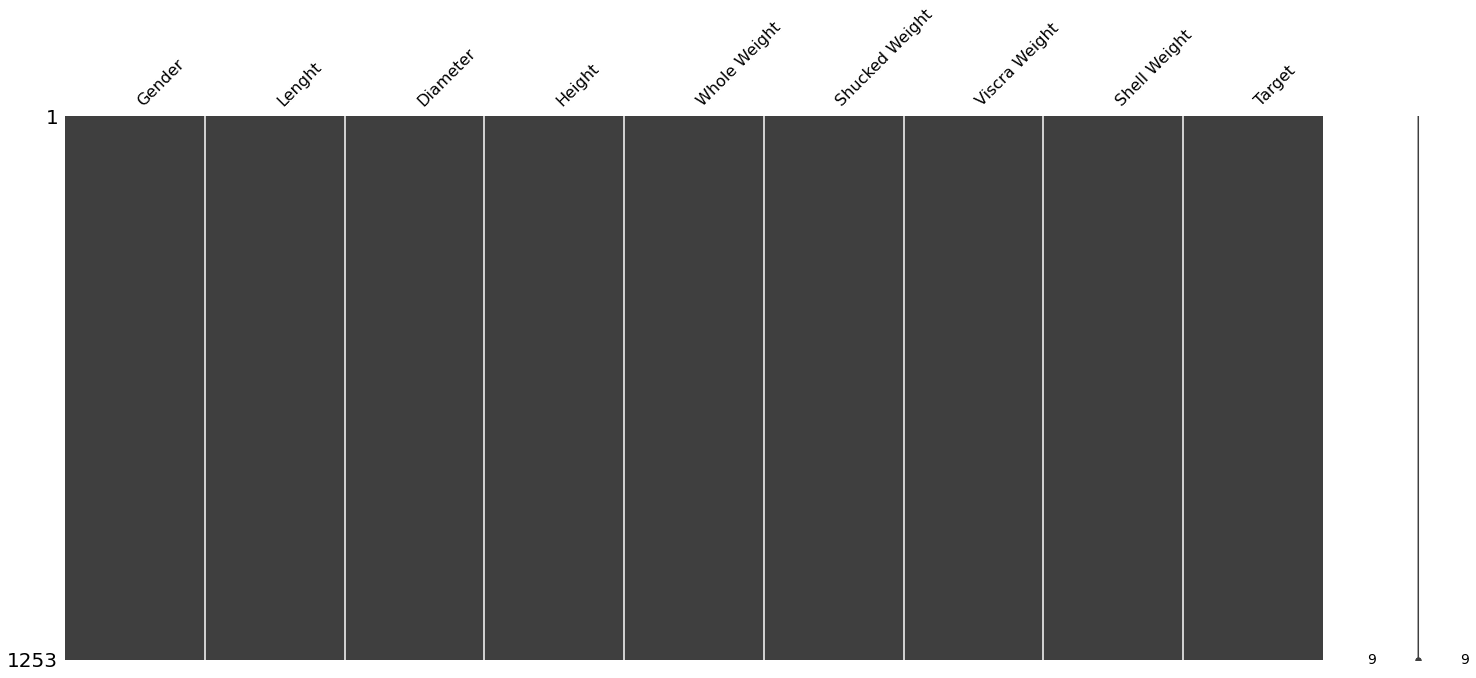

In [ ]:
msno.matrix(train)

In [ ]:
test.isnull().sum()

Gender            0
Lenght            0
Diameter          0
Height            0
Whole Weight      0
Shucked Weight    0
Viscra Weight     0
Shell Weight      0
dtype: int64

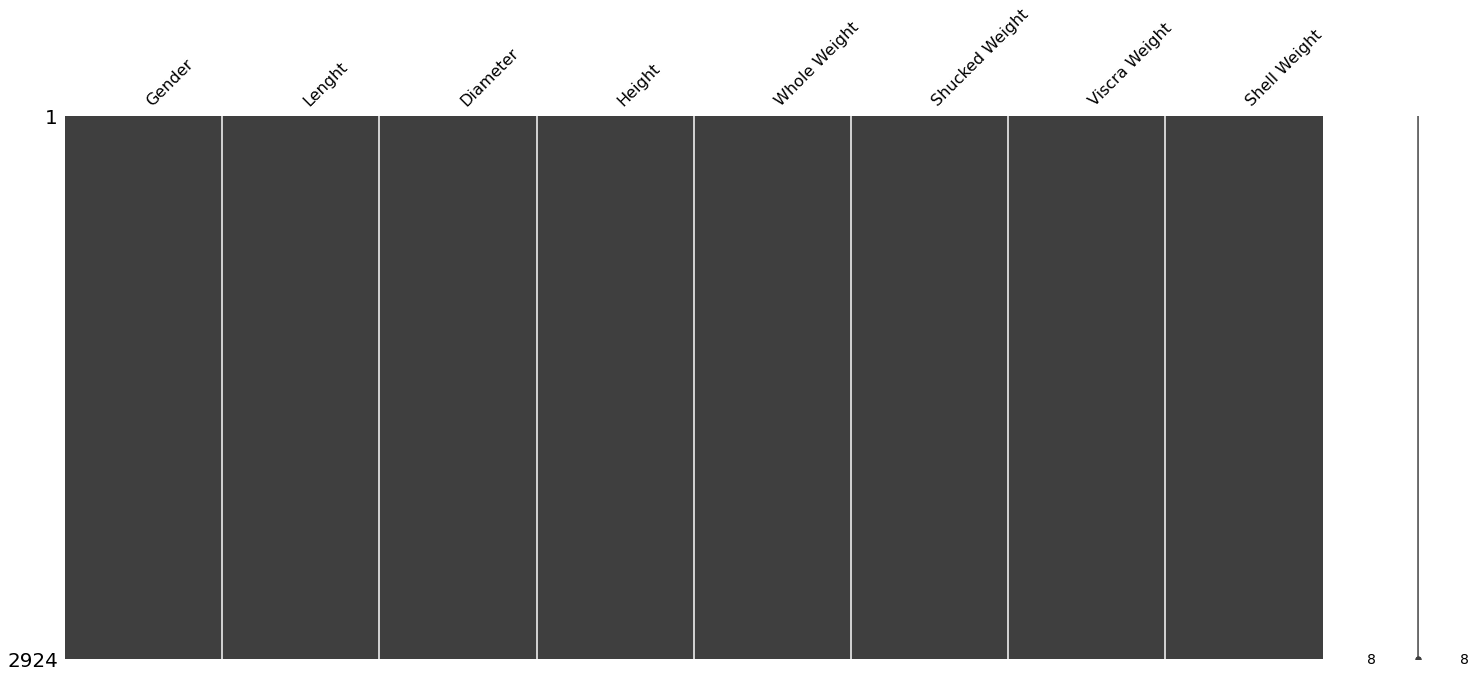

In [ ]:
msno.matrix(test)

# **Step 2. Target 분포 확인**
---

전복의 나이(`Target`)로는 어떠한 값들이 있는 지 확인해보자.

In [ ]:
unique_label = train['Target'].unique()      # Target의 고유 값만 출력
np.sort(unique_label)       # 오름차순으로 정렬

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 29])

- 전복의 나이가 3~23세, 29세인 것을 확인할 수 있다.

전복의 나이 별 갯수를 확인해보자.

In [ ]:
train.groupby('Target').count().iloc[:, 0]

Target
3       5
4      14
5      37
6      88
7     107
8     174
9     200
10    202
11    141
12     79
13     62
14     42
15     26
16     21
17     13
18     12
19      8
20     11
21      5
22      2
23      3
29      1
Name: Gender, dtype: int64

전복 나이 별 분포를 시각화해보자.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


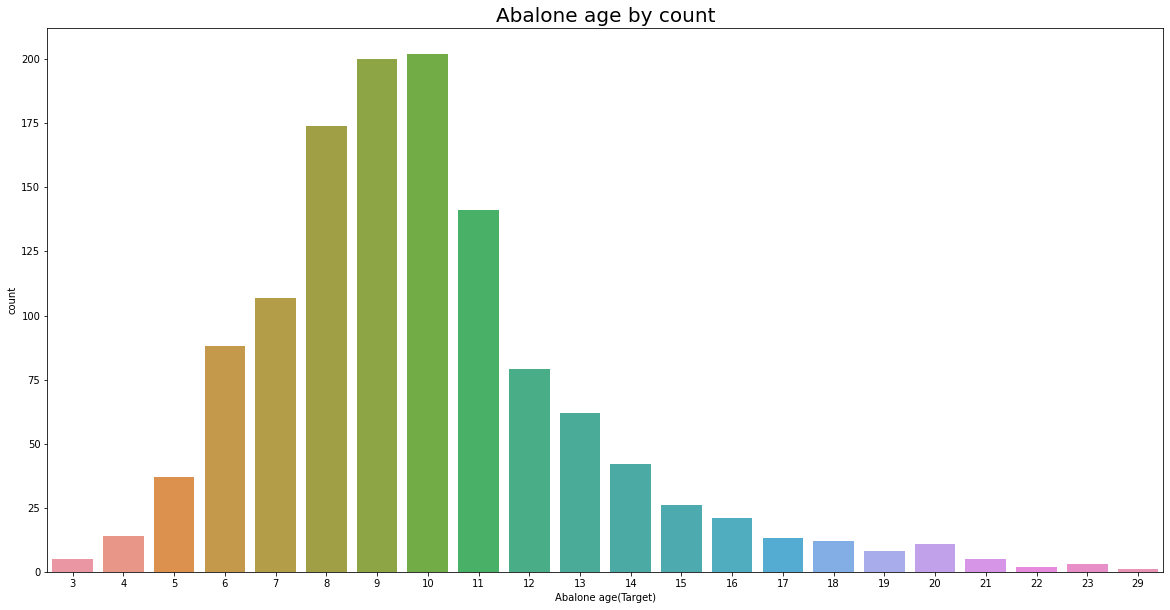

In [ ]:
fig = plt.figure(figsize=(20,10))

sns.countplot('Target', data = train)

plt.title('Abalone age by count', fontsize = 20)

plt.xlabel('Abalone age(Target)')
plt.ylabel('count')

plt.show()

- 8 ~ 11세인 전복의 갯수가 많은 것을 확인할 수 있다.

가장 나이가 어린 3세와 가장 나이가 많은 29세의 데이터를 확인해보자.

In [ ]:
age_29 = train[train['Target'] == 29]
age_29

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
762,F,0.7,0.585,0.185,1.8075,0.7055,0.3215,0.475,29


In [ ]:
age_3 = train[train['Target'] == 3]
age_3

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
20,M,0.155,0.11,0.040,0.0155,0.0065,0.003,0.005,3
210,I,0.195,0.15,0.045,0.0375,0.0180,0.006,0.011,3
285,I,0.130,0.10,0.030,0.0130,0.0045,0.003,0.004,3
463,I,0.110,0.09,0.030,0.0080,0.0025,0.002,0.003,3
1013,I,0.180,0.13,0.045,0.0275,0.0125,0.010,0.009,3


- 3세와 29세의 각 feature 별 데이터가 다르다는 것을 확인할 수 있다.(전반적으로 29세의 전복이 각 feature 별 값이 큼)
- 해당 데이터를 보면 모든 feature가 전복의 나이(Target)과 관계가 있다고 판단이 된다.

# **Step 3. Target과 feature의 상관관계**
---

`Target`과 각 feature들 간의 상관관계를 확인해보자.

In [ ]:
t_cols = train.columns[1:-1]
t_cols

Index(['Lenght', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight',
       'Viscra Weight', 'Shell Weight'],
      dtype='object')

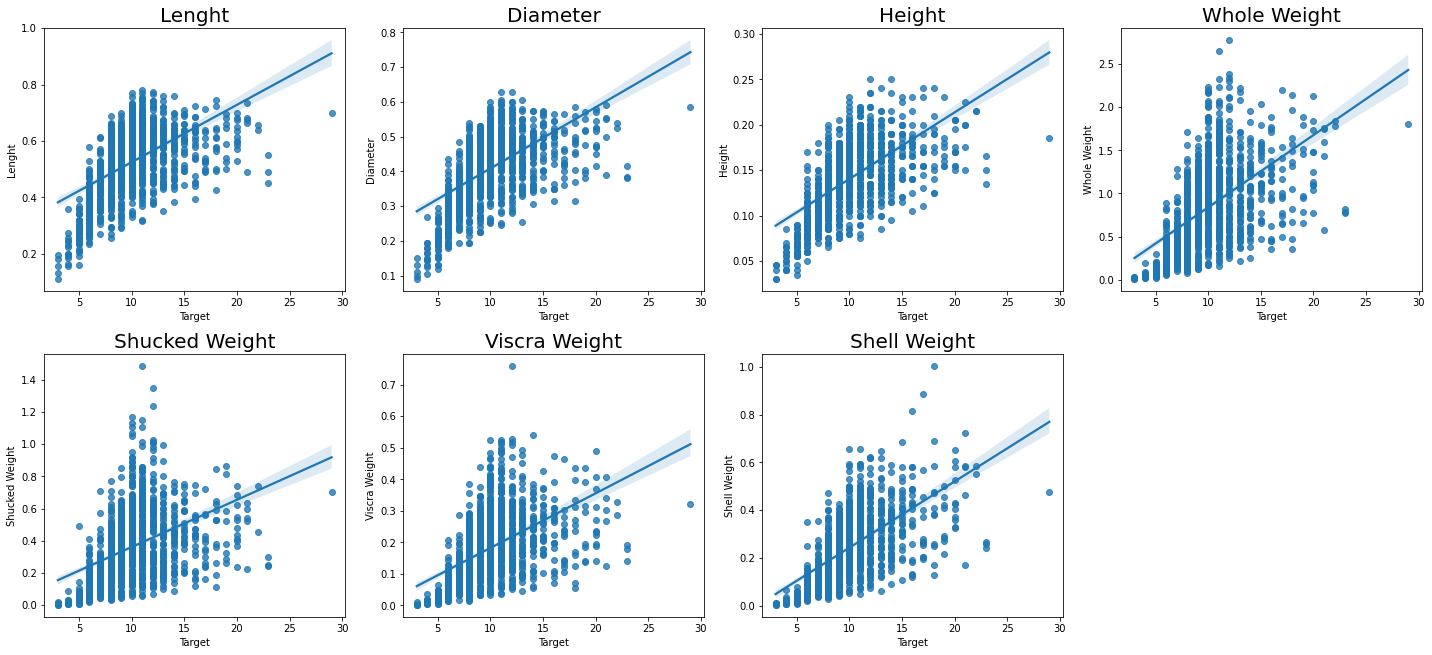

In [ ]:
fig = plt.figure(figsize=(20,10))

for i in range(len(t_cols)):
    plt.subplot(2, 4, i+1)
    plt.title(t_cols[i], fontsize = 20)
    sns.regplot(x = train['Target'], y = t_cols[i], data = train, fit_reg = True)

plt.tight_layout(rect = [0, 0.03, 1, 0.95])
plt.show()

- 모든 feature와 전복 나이(Target)이 양의 상관관계임을 알 수 있다.

그렇다면 feature와 전복 나이(Target)의 상관계수를 확인해보자.

In [ ]:
train_corr = train.drop(columns = ['Gender'], axis = 1)

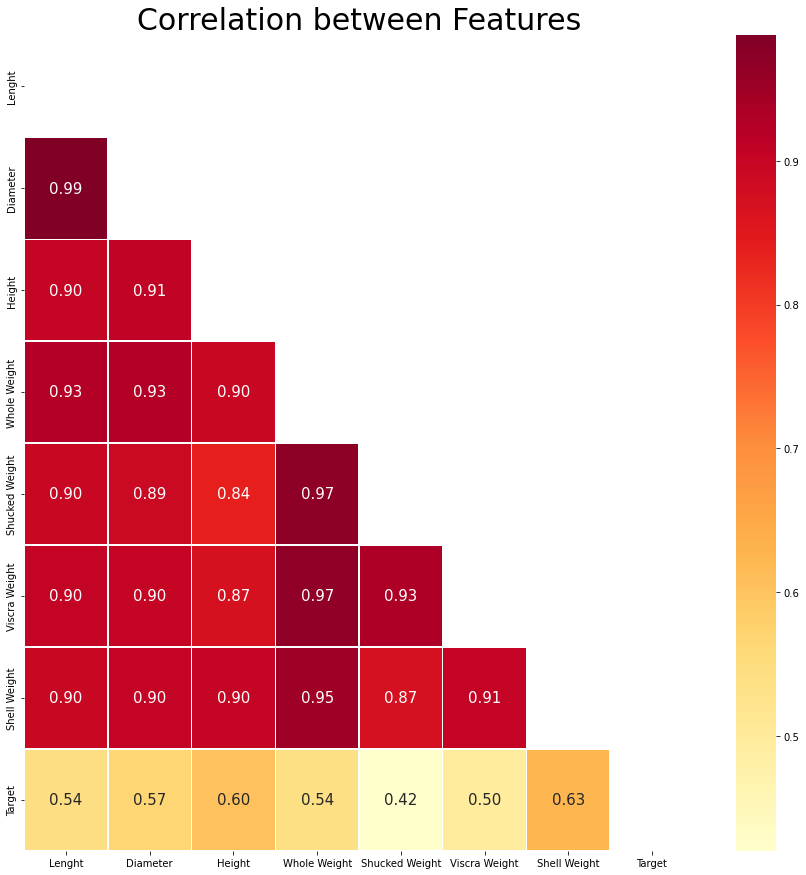

In [ ]:
fig = plt.figure(figsize=(15, 15))

heat_table = train.corr(method = 'pearson')

mask  = np.zeros_like(heat_table)
mask[np.triu_indices_from(mask)] = True

heatmap = sns.heatmap(heat_table, annot = True, annot_kws = {'size' : 15}, fmt = '.2f', linewidths = .5, cmap = 'YlOrRd', mask = mask)

plt.title('Correlation between Features', fontsize = 30)
plt.show()

# **Step 4. 데이터 전처리**
---

## **4.1 Gender**

> **sns.countplot**  
> : 각 카테고리 별 데이터가 얼마나 있는지 표현  
> [Seaborn을 사용한 데이터 분포 시각화](https://datascienceschool.net/01%20python/05.04%20%EC%8B%9C%EB%B3%B8%EC%9D%84%20%EC%82%AC%EC%9A%A9%ED%95%9C%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%ED%8F%AC%20%EC%8B%9C%EA%B0%81%ED%99%94.html)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


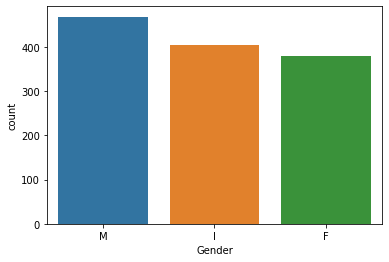

In [ ]:
sns.countplot('Gender',data = train)

In [ ]:
cols = train.columns[1:]
cols

Index(['Lenght', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight',
       'Viscra Weight', 'Shell Weight', 'Target'],
      dtype='object')

> **sns.boxplot**  
> : 박스는 실수 값 분포에서 1사분위수(Q1)와 3사분위수(Q3)를 뜻하고 Q3 - Q1을 나타낸다.  
>  중앙값, 표준 편차 등 분포의 간략한 특성을 보여준다.

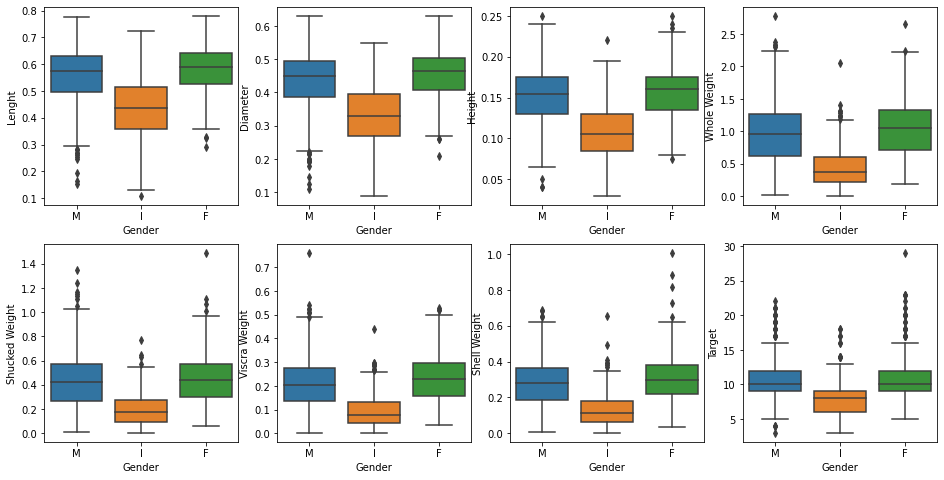

In [ ]:
fig = plt.figure(figsize=(16,8))

for i,col in enumerate(cols):
    fig.add_subplot(2,4,i+1)
    sns.boxplot(x="Gender", y=col, data=train)

- 전반적으로 성별 `I`의 값이 전체 feature에서 낮은 것으로 확인된다.
- 그리고 `M`과 `F`의 값이 유사한 것을 확인할 수 있다.
- 각 feature 별로 이상치가 몇 개 있으나 train 데이터의 수가 작으니 우선 제거하지 않고 진행하고자 한다.

> **sns.pariplot**  
> : 3차원 이상의 데이터일 때 사용한다. 데이터프레임을 인수로 받아 그리드(grid) 형태로 각 데이터 열의 조합에 대해 스케터 플롯을 그린다.  
>   같은 데이터가 만나는 대각선 영역에는 해당 데이터의 커널밀도추정 그래프를 그린다.

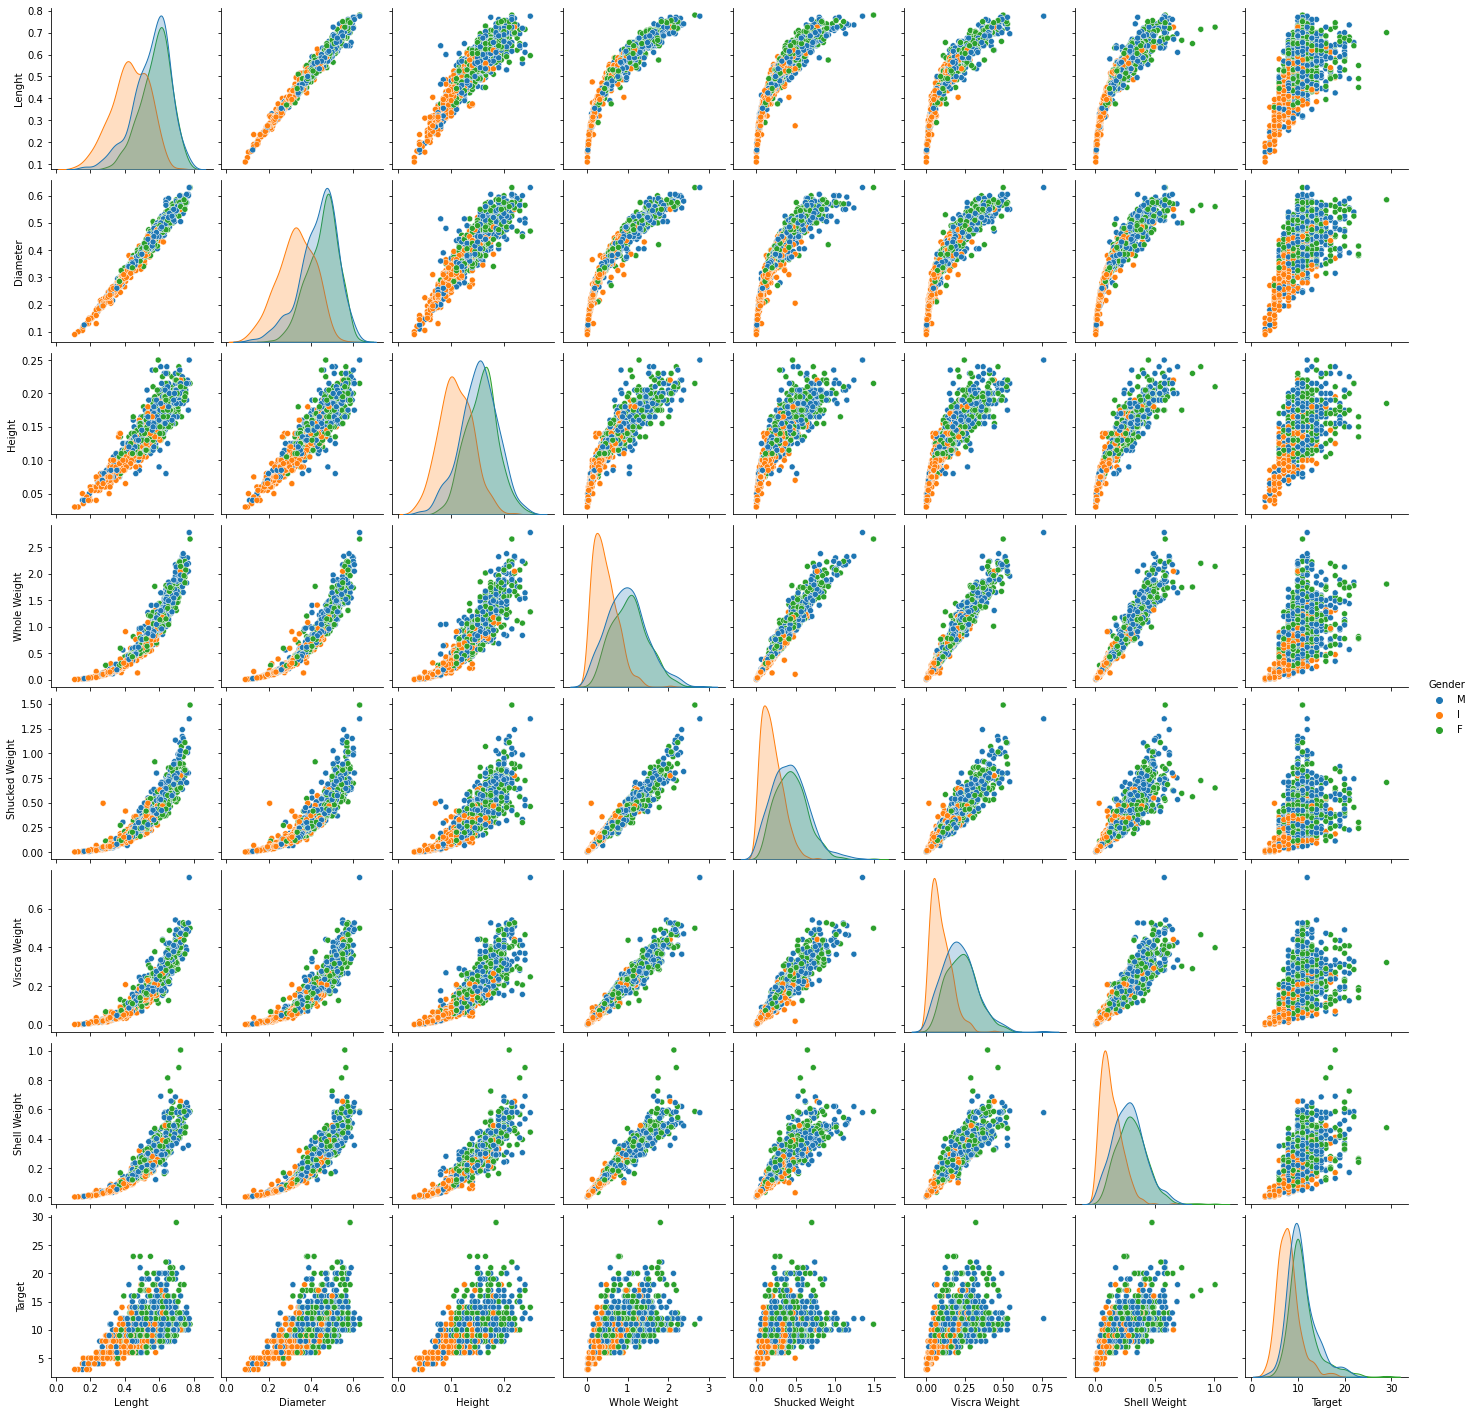

In [ ]:
sns_plot = sns.pairplot(train, hue = 'Gender')
plt.show()

성별에 따른 전복 나이의 분포를 확인해보자.

> **sns.kdeplot**  
> : 커널 밀도(kernel density)는 커널이라는 함수를 겹치는 방법으로 히스토그램보다 부드러운 형태의 분포 곡선을 보여주는 방법

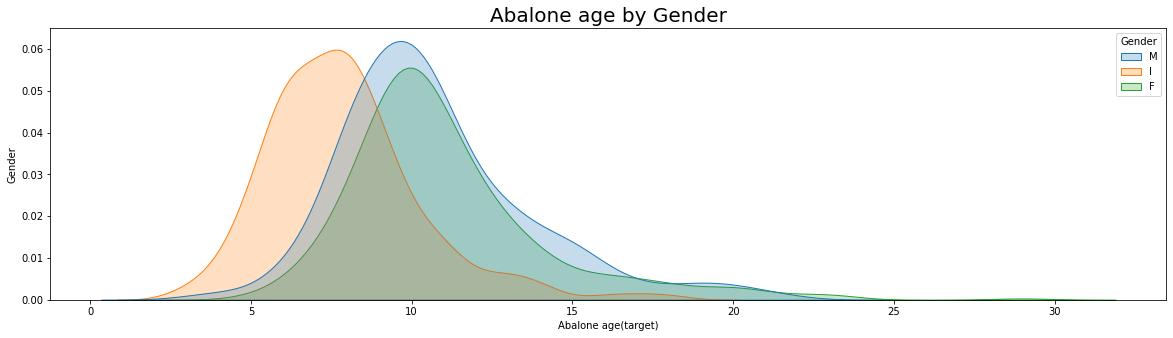

In [ ]:
fig = plt.figure(figsize=(20,5))

sns.kdeplot('Target', hue = 'Gender', data = train, shade = True)
plt.title('Abalone age by Gender', fontsize = 20)
plt.xlabel('Abalone age(target)')
plt.ylabel('Gender')
plt.show()

- `I`의 나이가 다른 성별에 비해 어리다.
- `M과 F`의 나이에 따른 분포가 유사한 것을 확인할 수 있다.

범주형 데이터이므로 `라벨 인코딩(Label Encoding)`을 해보자.  
그리고 `Gender`의 분포를 다양한 방법으로 확인하였을 때, `M`과 `F`의 분포가 비슷한 것을 확인할 수 있다.  
그래서 `M`과 `F`를 합친 후 0으로 라벨 인코딩을 하고, 분포의 차이가 있는 `I`를 1로 라벨인코딩을 해보자.

In [ ]:
Gender_mapping = {'M' : 0, 'F' : 0, 'I' : 1}
train['Gender'] = train['Gender'].map(Gender_mapping)
test['Gender'] = test['Gender'].map(Gender_mapping)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


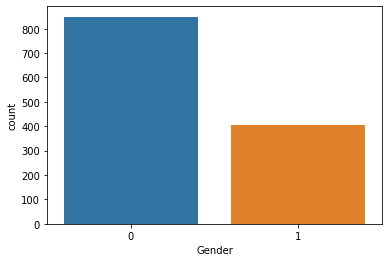

In [ ]:
sns.countplot('Gender',data = train)

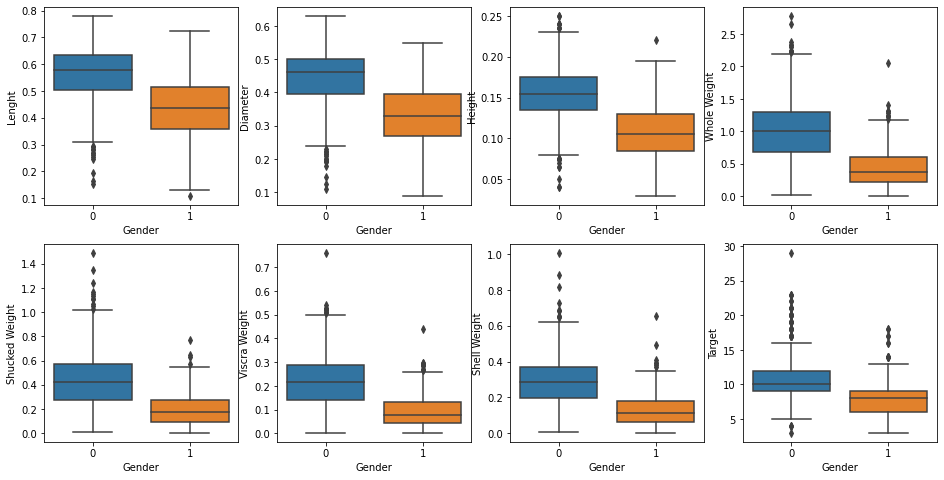

In [ ]:
fig = plt.figure(figsize=(16,8))

for i,col in enumerate(cols):
    fig.add_subplot(2,4,i+1)
    sns.boxplot(x="Gender", y=col, data=train)

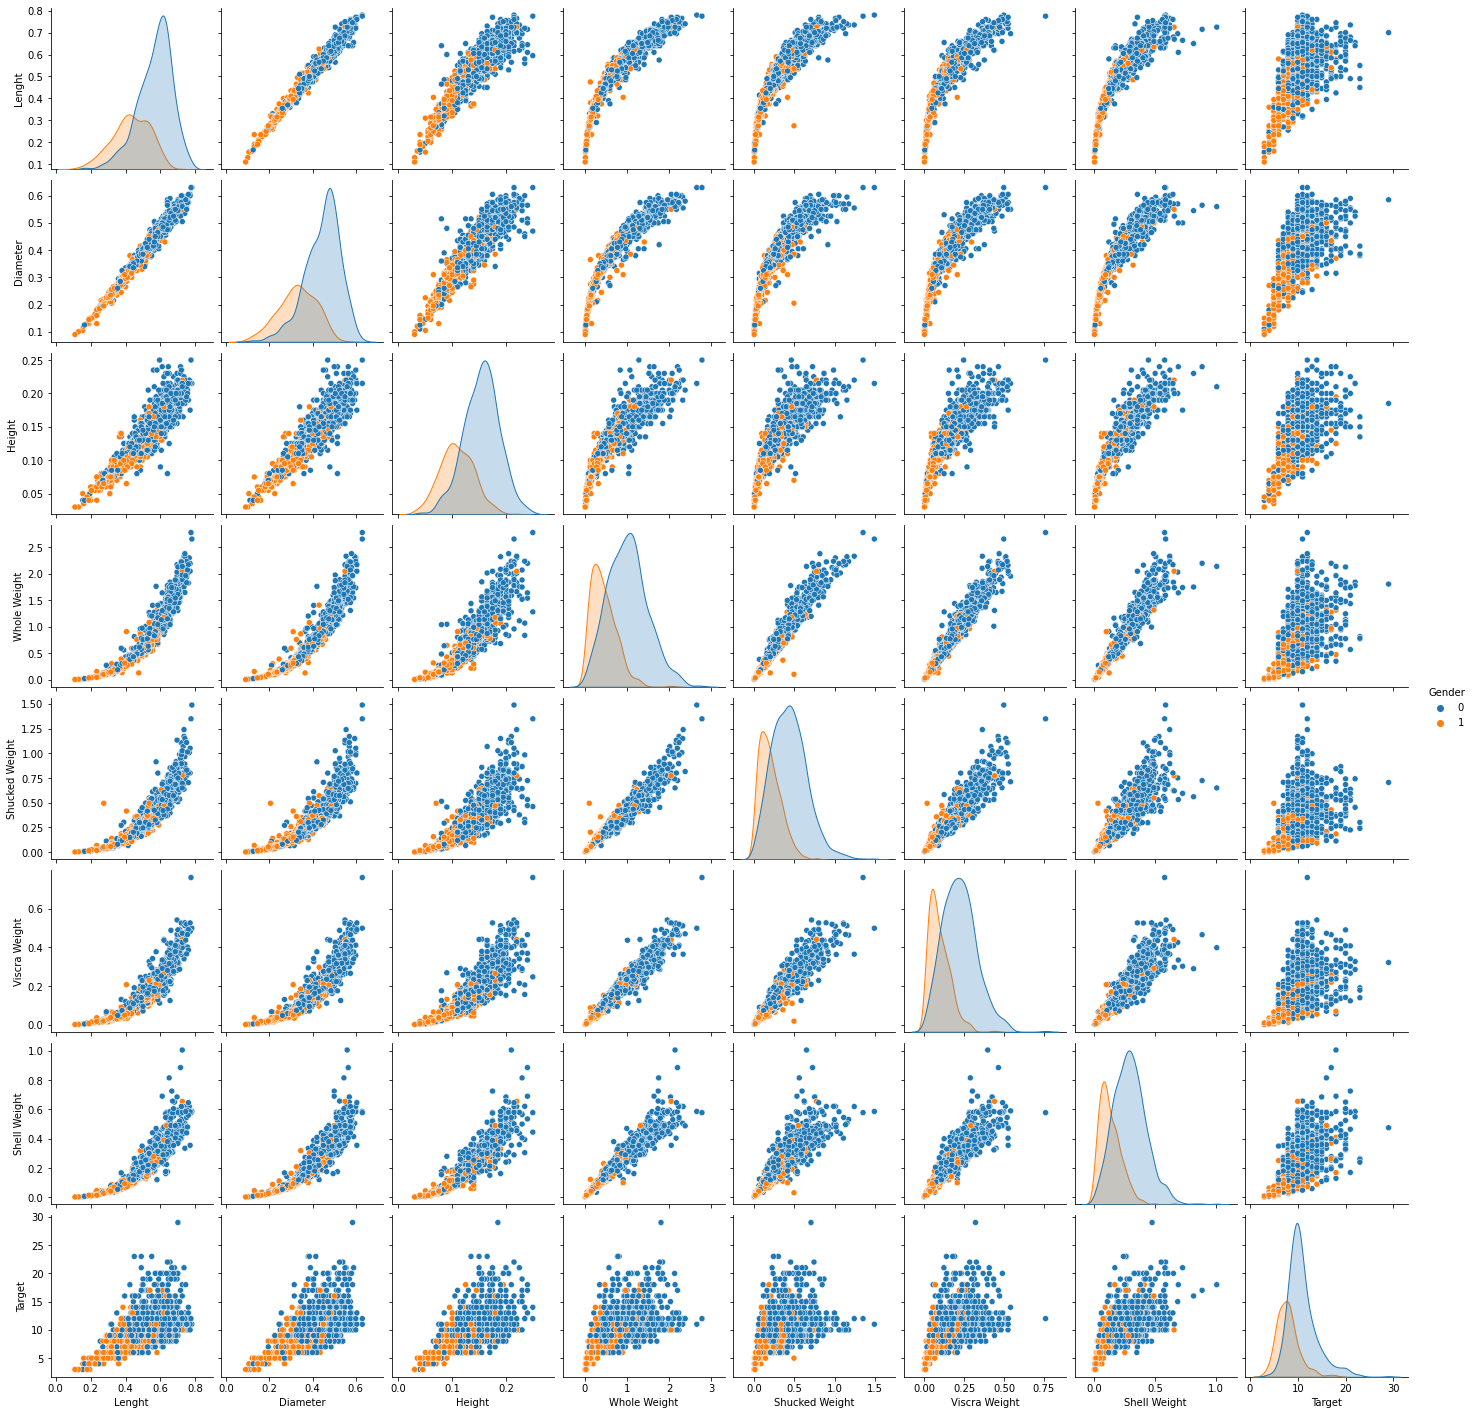

In [ ]:
sns_plot = sns.pairplot(train, hue = 'Gender')
plt.show()

- `M`과 `F`를 합친 후의 데이터 분포를 다시 확인해보았다.
- 명확하게 `I`와의 분포 차이를 볼 수 있다.

## **4.2 연속형 변수**

**4.2.1 정규화**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2756854b10>,
      dtype=object)

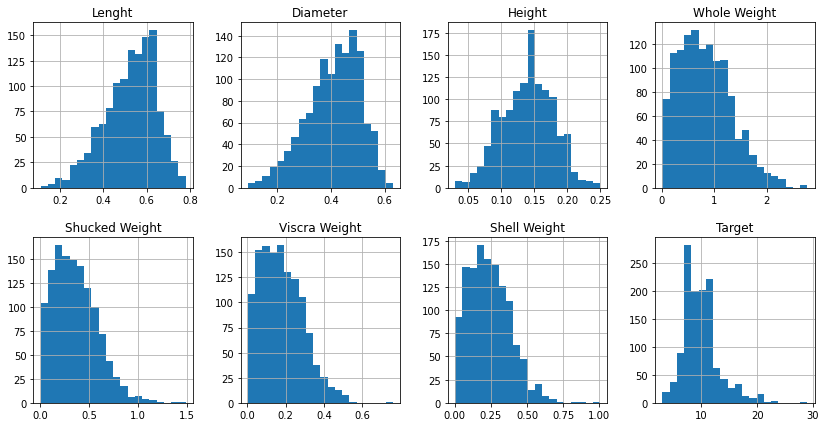

In [ ]:
train[cols].hist(figsize=(14,7), grid = True, layout = (2,4), bins = 20)

**4.2.2 이상치 처리**

- 아래의 데이터를 이상치로 판단하여 제거해주고자 한다.
    - 껍질을 제외한 무게 > 전복 전체 무게
    - 껍질을 제외한 무게 < 전복 내장 무게
    - 껍질을 제외한 무게 + 껍질 무게 > 전복 전체 무게

껍질을 제외한 무게 > 전복 전체 무게

In [ ]:
train[train['Shucked Weight'] > train['Whole Weight']]

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
435,1,0.475,0.365,0.10,0.1315,0.2025,0.0875,0.1230,7
1078,1,0.275,0.205,0.07,0.1055,0.4950,0.0190,0.0315,5


In [ ]:
train = train.drop(index = [435, 1078], axis = 0)

껍질을 제외한 무게 < 전복 내장 무게

In [ ]:
train[train['Shucked Weight'] < train['Viscra Weight']]

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
465,0,0.415,0.315,0.125,0.388,0.068,0.09,0.125,12


In [ ]:
train = train.drop(index = [465], axis = 0)

껍질을 제외한 무게 + 껍질 무게 > 전복 전체 무게

In [ ]:
train[train['Whole Weight'] < train['Shucked Weight'] + train['Shell Weight']]

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
47,1,0.380,0.275,0.095,0.1375,0.086,0.0585,0.0605,7
382,1,0.455,0.330,0.100,0.3720,0.358,0.0775,0.1100,8
847,1,0.230,0.165,0.060,0.0515,0.019,0.0145,0.0360,4


In [ ]:
train = train.drop(index = [47, 382, 847], axis = 0)

# **Step 5. 모델 학습**
---

In [ ]:
X_train = train.drop('Target', axis = 1)
y_train = train['Target']

In [ ]:
!pip install catboost

     |████████████████████████████████| 76.1 MB 1.2 MB/s 


In [ ]:
from catboost import CatBoostRegressor

In [ ]:
# 모델 생성
cat = CatBoostRegressor()

In [ ]:
# 모델 학습
cat.fit(X_train, y_train)

Learning rate set to 0.042396
0:	learn: 3.1628438	total: 49.8ms	remaining: 49.7s
1:	learn: 3.1229882	total: 52.2ms	remaining: 26s
2:	learn: 3.0789485	total: 54.5ms	remaining: 18.1s
3:	learn: 3.0374546	total: 56.5ms	remaining: 14.1s
4:	learn: 2.9995745	total: 58.1ms	remaining: 11.6s
5:	learn: 2.9597793	total: 60.4ms	remaining: 10s
6:	learn: 2.9213700	total: 62.7ms	remaining: 8.9s
7:	learn: 2.8857538	total: 64.9ms	remaining: 8.04s
8:	learn: 2.8516870	total: 67ms	remaining: 7.38s
9:	learn: 2.8224394	total: 68.6ms	remaining: 6.79s
10:	learn: 2.7959356	total: 70.8ms	remaining: 6.36s
11:	learn: 2.7701120	total: 73ms	remaining: 6.01s
12:	learn: 2.7480296	total: 74.9ms	remaining: 5.69s
13:	learn: 2.7236535	total: 77ms	remaining: 5.42s
14:	learn: 2.7036992	total: 79ms	remaining: 5.19s
15:	learn: 2.6815439	total: 81.3ms	remaining: 5s
16:	learn: 2.6612147	total: 83.5ms	remaining: 4.83s
17:	learn: 2.6414932	total: 85.8ms	remaining: 4.68s
18:	learn: 2.6254964	total: 88.2ms	remaining: 4.55s
19:	lear

In [ ]:
# 모델 예측
cat_pred = cat.predict(test)

# **Step 6. 제출하기**
---

In [ ]:
submission = pd.read_csv('/content/drive/MyDrive/[DACON] abalone/sample_submission.csv')

submission.head()

,id,Target
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [ ]:
submission['Target'] = np.round(cat_pred)
submission

,id,Target
0,1,8.0
1,2,13.0
2,3,5.0
3,4,11.0
4,5,10.0
...,...,...
2919,2920,4.0
2920,2921,7.0
2921,2922,9.0
2922,2923,9.0


In [ ]:
submission.to_csv('0331_catboost.csv', index=False)

# **catboost 참고 자료**
- https://zephyrnet.com/ko/catboost%EB%A1%9C-%EB%B9%A0%EB%A5%B8-%EA%B7%B8%EB%9D%BC%EB%94%94%EC%96%B8%ED%8A%B8-%EB%B6%80%EC%8A%A4%ED%8C%85/